# Proyecto Final Integrador
## Equipo 4

## Predicción de riesgo de default en microcréditos, con datos de Lending Club (2007-2015) 
Predicting Microloan default risk with Lending Club data (2007-2015)

## Introduction

Estamos interesados en usar modelos predictivos para evaluar riesgo en microcréditos, como los otorgados por la fintech local Afluenta.
Encontramos un dataset de Lending Club en Kaggle, con features muy similares, y 2.2 millones de observaciones. 



Pueden ver más información sobre Afluenta en  www.afluenta.com 
y el dataset de Lending Club en: https://www.kaggle.com/wendykan/lending-club-loan-data



### Contenido:

00 - Data Load <br>
01 - Exploratory Data Analysis <br>
02 - Data Cleaning and Transformation <br>
03 - Benchmark - Average, Naive Gauss <br>
04 - KNN, Logistic Regression <br>
05 - Decision Tree, Random Forest <br>
06 - XGBoost <br>
07 - Feature Engineering <br>
08 - GridSearch <br>
09 - Pipeline and final model <br>
10 - Results <br>
11 - Sources and credits <br>

## Paso 0: Data load

In [1]:
# Importamos las librerías
import pandas as pd


# Opcionesd de configuración para poder visualizar el dataset
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 200)

In [2]:
# Full version para modelo final
# df = pd.read_csv('loan.csv',parse_dates=['issue_d'])


# Muestreo para Exploratory Data Analysis y testeo de modelos
df = pd.read_csv('../loan.csv',parse_dates=['issue_d']).sample(1000)

C:\Users\Usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = pd.DataFrame(df)

In [4]:
df_description = pd.read_excel('../LCDataDictionary.xlsx')

## Paso 1: Análisis Exploratorio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2257048 to 415445
Columns: 145 entries, id to settlement_term
dtypes: datetime64[ns](1), float64(105), int64(4), object(35)
memory usage: 1.1+ MB


In [6]:
df.describe

<bound method NDFrame.describe of          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
2257048 NaN        NaN      10000        10000     10000.000000   36 months   
1000501 NaN        NaN       8000         8000      8000.000000   36 months   
406616  NaN        NaN      12000        12000     12000.000000   36 months   
1968333 NaN        NaN      28000        28000     28000.000000   36 months   
2155395 NaN        NaN       6000         6000      5975.000000   36 months   
231896  NaN        NaN      25000        25000     25000.000000   36 months   
641742  NaN        NaN      20000        20000     20000.000000   36 months   
1505873 NaN        NaN       8000         8000      8000.000000   36 months   
2154238 NaN        NaN      30000        30000     30000.000000   60 months   
159439  NaN        NaN       3000         3000      3000.000000   36 months   
1182918 NaN        NaN      22000        22000     22000.000000   60 months   
1799234 NaN       

In [7]:
df.shape

(1000, 145)

In [8]:
df.sample(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1904044 NaN        NaN       3000         3000           3000.0   36 months   
760163  NaN        NaN      21500        21500          21500.0   60 months   
686775  NaN        NaN      11200        11200          11200.0   60 months   
11044   NaN        NaN      11000        11000          11000.0   60 months   
1982434 NaN        NaN       7500         7500           7500.0   36 months   
1856378 NaN        NaN      22000        22000          21950.0   36 months   
1367843 NaN        NaN      10000        10000          10000.0   36 months   
2147840 NaN        NaN      20000        20000          20000.0   60 months   
208920  NaN        NaN      25000        25000          25000.0   60 months   
253978  NaN        NaN      18000        18000          18000.0   60 months   

         int_rate  installment grade sub_grade  \
1904044     16.29       105.91     D        D2   
760163      16.29       526.16     D        D1   
686775      26.57       339.13     F        F5   
11044       10.33       235.51     B        B1   
1982434     11.67       247.93     B        B4   
1856378      7.90       688.39     A        A4   
1367843     13.49       339.31     C        C2   
2147840     21.45       546.15     D        D5   
208920      22.35       695.46     D        D5   
253978      27.27       552.55     E        E5   

                                       emp_title emp_length home_ownership  \
1904044                  Food service supervisor  10+ years           RENT   
760163                                   Trooper  10+ years       MORTGAGE   
686775                            banquet server    5 years            OWN   
11044    Construction and Maintenance Supervisor  10+ years       MORTGAGE   
1982434                               Temporary     7 years            OWN   
1856378                               Kennametal    5 years           RENT   
1367843                        Inventory Manager    4 years       MORTGAGE   
2147840                           Home Attendant    4 years            OWN   
208920                           Project Manager     1 year       MORTGAGE   
253978                            Billing Clerk      1 year       MORTGAGE   

         annual_inc verification_status    issue_d         loan_status  \
1904044     52000.0        Not Verified 2014-10-01         Charged Off   
760163     109000.0            Verified 2016-03-01          Fully Paid   
686775      46000.0            Verified 2016-04-01          Fully Paid   
11044      126500.0        Not Verified 2018-12-01          Fully Paid   
1982434     38000.0        Not Verified 2014-07-01          Fully Paid   
1856378     45000.0            Verified 2012-03-01          Fully Paid   
1367843     68000.0        Not Verified 2017-03-01          Fully Paid   
2147840     38000.0     Source Verified 2017-12-01             Current   
208920      60000.0            Verified 2018-08-01  Late (31-120 days)   
253978      61000.0     Source Verified 2018-07-01             Current   

        pymnt_plan  url desc             purpose                    title  \
1904044          n  NaN  NaN         credit_card  Credit card refinancing   
760163           n  NaN  NaN  debt_consolidation       Debt consolidation   
686775           n  NaN  NaN  debt_consolidation       Debt consolidation   
11044            n  NaN  NaN    home_improvement         Home improvement   
1982434          n  NaN  NaN  debt_consolidation       Debt consolidation   
1856378          n  NaN  NaN  debt_consolidation              One Payment   
1367843          n  NaN  NaN  debt_consolidation       Debt consolidation   
2147840          n  NaN  NaN  debt_consolidation       Debt consolidation   
208920           n  NaN  NaN  debt_consolidation       Debt consolidation   
253978           n  NaN  NaN  debt_consolidation       Debt consolidation   

        zip_code addr_state    dti  delinq_2yrs earliest_cr_line  

In [9]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

Tenemos 145 features. Para la primer aproximación al problema, vamos a tomar sólo datos de los tomadores de créditos. Podríamos intentar un segundo análisis con los datos de evolución del crédito.

Estos son los features que tenemos disponibles. Vamos a empezar el análisis para seleccionar el Target. 

#### 4.1: Target

In [10]:
df['loan_status'].value_counts()

Fully Paid                                            456
Current                                               425
Charged Off                                           105
Late (31-120 days)                                      8
In Grace Period                                         3
Late (16-30 days)                                       2
Does not meet the credit policy. Status:Fully Paid      1
Name: loan_status, dtype: int64

Loan Status es un buen candidato a Target. Charged-off significa que el crédito no fue pagado, y que el acreedor ha dejado de intentar cobrarlo. Fully Paid es el crédito totalmente pago. Una aproximación inicial podría ser descartar los créditos en curso, con mora o no, y quedarnos con los terminados.
Vamos a perder información, ya que los Fully Paid pueden haber tenido una mora y refinanciación.

De todas maneras, el dataset está fuertemente desbalanceado hacia el "cero" del target.

#### 4.2: Features numéricos

Podemos ver los features que tenemos disponibles. Vamos a analizar los siguientes features: <br>
- loan_amnt
- int_rate
- installment
- grade
- subgrade 
- term
- emp_lenght
- annual_income
- delinq_2yrs
- dti
- open_acc

In [11]:
df['loan_amnt'].min()

1000

In [12]:
df['loan_amnt'].max()

40000

In [13]:
df['loan_amnt'].mean()

15033.4

Vamos a usar ```seaborn``` para visualizar las distribuciones

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=7,7


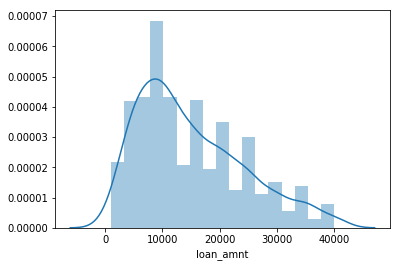

In [15]:
sns.distplot(df['loan_amnt'])

La distibución de los montos es multimodal, aunque concentrada alrededor de la media y con long tail hacia el máximo. Vamos a ver las tasas de interés:

In [16]:
df['int_rate'].min()

5.31

In [17]:
df['int_rate'].max()

30.89

In [18]:
df['int_rate'].mean()

13.091529999999938

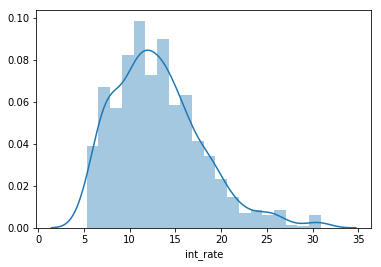

In [19]:
sns.distplot(df['int_rate'])

Es parecida a monto. Vamos a ver correlación con  Seaborn's Kernel Density Estimator (KDE) (https://seaborn.pydata.org/tutorial/distributions.html)

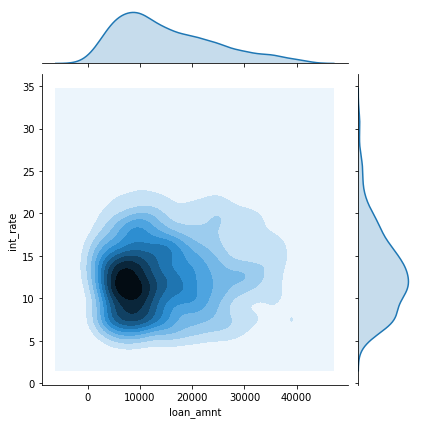

In [20]:
sns.jointplot(x=df['loan_amnt'], y=df['int_rate'], data=df, kind="kde")

Ya tenemos una visión sobre monto e interés. Vamos a ver el resto de los features.

In [21]:
df['term'].value_counts()

 36 months    710
 60 months    290
Name: term, dtype: int64

In [22]:
df['grade'].value_counts()

C    299
B    295
A    190
D    139
E     56
F     14
G      7
Name: grade, dtype: int64

In [23]:
df['sub_grade'].value_counts()

C2    67
C5    66
B3    63
B2    60
B4    60
C1    59
B5    58
C3    57
B1    54
C4    50
A5    45
A4    42
D2    40
A1    37
A3    33
A2    33
D1    27
D5    25
D3    25
D4    22
E3    18
E1    12
E4    12
E2    10
F5     4
F1     4
E5     4
G1     3
F4     3
G2     2
F2     2
G3     2
F3     1
Name: sub_grade, dtype: int64

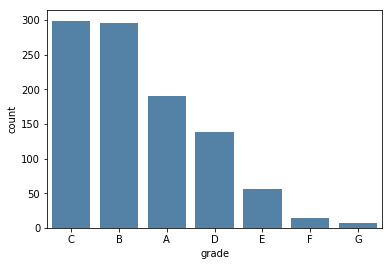

In [24]:
sns.countplot(x=df['grade'], data = df, color= 'steelblue',  order = df['grade'].value_counts().index )

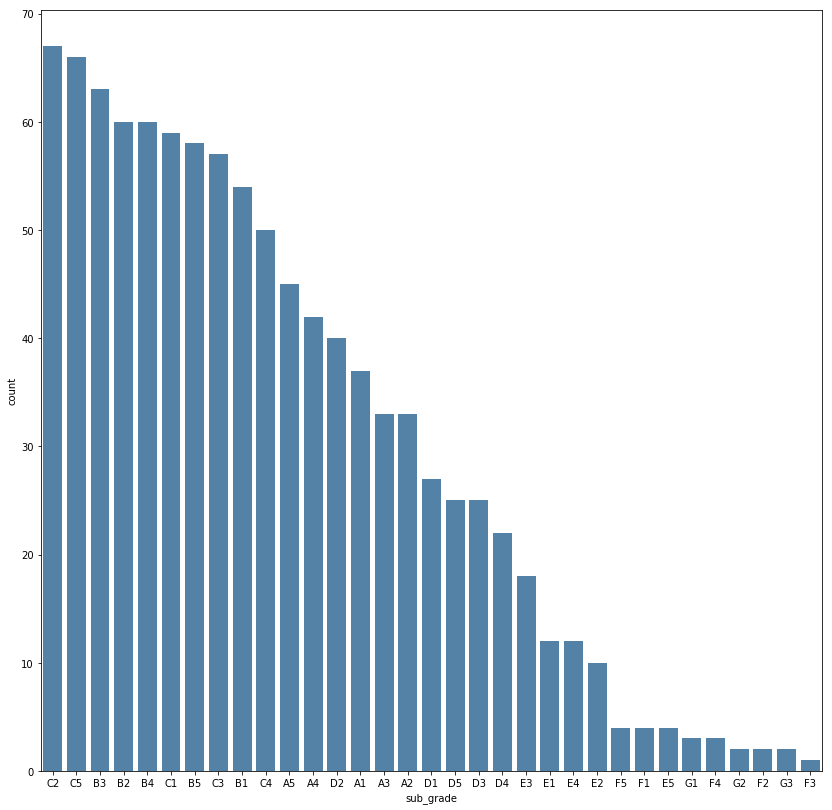

In [25]:
plt.rcParams['figure.figsize']=14,14
sns.countplot(x=df['sub_grade'], data = df, order = df['sub_grade'].value_counts().index,
             color='steelblue')

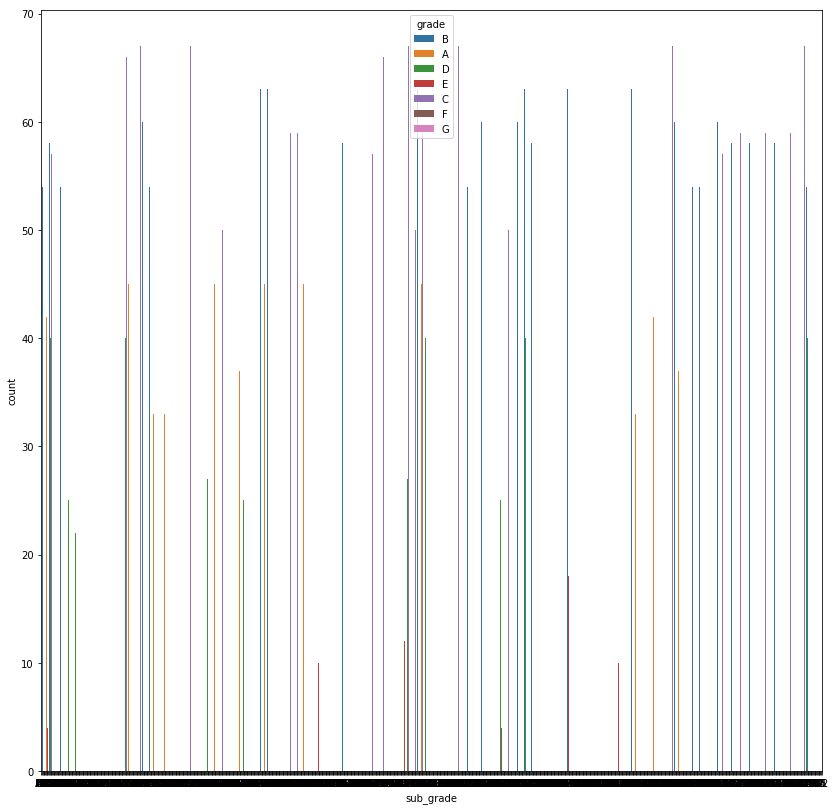

In [26]:
plt.rcParams['figure.figsize']=14,14
sns.countplot(x=df['sub_grade'],
              data = df,
              order = df['sub_grade'],
              hue=df['grade'],
              )
# LPM lo quiero ordenar por orden de etiqueta XXXXXXXXXXXXXXXXXX

In [27]:
# Esto es la cuota (pago mensual))
print("minima ")
display(df['installment'].min())

print("máxima ")
display(df['installment'].max())

print("media")
display(df['installment'].mean())

minima 


31.55

máxima 


1425.92

media


443.81650999999977

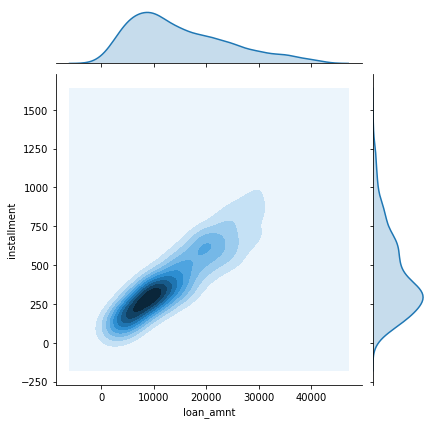

In [28]:
sns.jointplot(x=df['loan_amnt'], y=df['installment'], data=df, kind="kde")


Está correlacionado en forma lineal.

In [29]:
# Esto es el ratio Deuda-a-Ingresos
print("minima ")
display(df['dti'].min())

print("máxima ")
display(df['dti'].max())

print("media")
display(df['dti'].mean())

minima 


0.5

máxima 


96.7

media


18.591292585170336

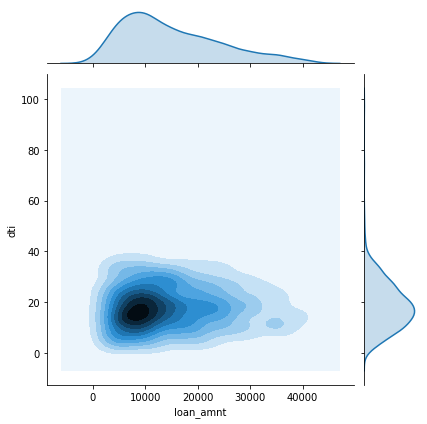

In [30]:
sns.jointplot(x=df['loan_amnt'], y=df['dti'], data=df, kind="kde")

Tengo outliers fuertes en DTI

In [31]:
(df['dti']).round().value_counts()

16.0    47
14.0    45
20.0    45
10.0    44
15.0    44
18.0    42
19.0    41
21.0    40
17.0    40
12.0    39
13.0    38
22.0    35
25.0    32
11.0    30
24.0    30
9.0     29
28.0    28
8.0     28
7.0     26
26.0    25
33.0    24
27.0    24
23.0    23
29.0    23
6.0     18
5.0     17
3.0     16
30.0    16
34.0    16
4.0     14
32.0    11
31.0    10
35.0    10
2.0      9
39.0     6
1.0      5
36.0     5
37.0     5
38.0     4
44.0     2
54.0     2
50.0     2
0.0      1
43.0     1
45.0     1
46.0     1
97.0     1
73.0     1
41.0     1
42.0     1
Name: dti, dtype: int64

In [32]:
df2 = df[df.loc[:,'dti']< 50]

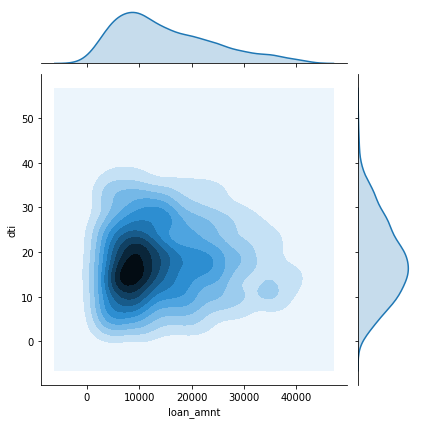

In [33]:
sns.jointplot(x=df2['loan_amnt'], y=df2['dti'], data=df, kind="kde")

Ahora podemos ver la distribución y la relación con el monto del crédito.

In [34]:
# Esto es cuantas líneas de crédito tiene el tomador
print("minima ")
display(df['open_acc'].min())

print("máxima ")
display(df['open_acc'].max())

print("media")
display(df['open_acc'].mean())

minima 


1.0

máxima 


49.0

media


11.761

In [35]:
#Esto es el tiempo, en su empleo actual, del tomador
df['emp_length'].value_counts()

10+ years    363
1 year        85
< 1 year      84
2 years       83
3 years       67
4 years       61
5 years       50
7 years       48
6 years       38
8 years       34
9 years       31
Name: emp_length, dtype: int64

En la etapa de Transformación y limpieza, este campo va a requerir transformar el string en numérico

#### 4.2: Features Categóricos

- emp_title
- home_ownership
- verification_status
- purpose
- application_type

In [36]:
df['emp_title'].value_counts()

Manager                                     17
Teacher                                     14
Registered Nurse                            10
Owner                                        8
Project Manager                              7
Supervisor                                   7
Sales                                        6
teacher                                      6
Office Manager                               5
RN                                           5
General Manager                              4
Nurse                                        4
Driver                                       4
Analyst                                      4
Engineer                                     4
Laborer                                      3
Operations Manager                           3
Administrator                                3
Police officer                               3
Sales Manager                                3
Mechanic                                     3
sales        

Este feature es importante, pero difícil de trabajar por la cantidad de valores distintos, y el "long tail" de puestos con pocas ocurrencias.
Podemos evaluar la interacción con annual_income.

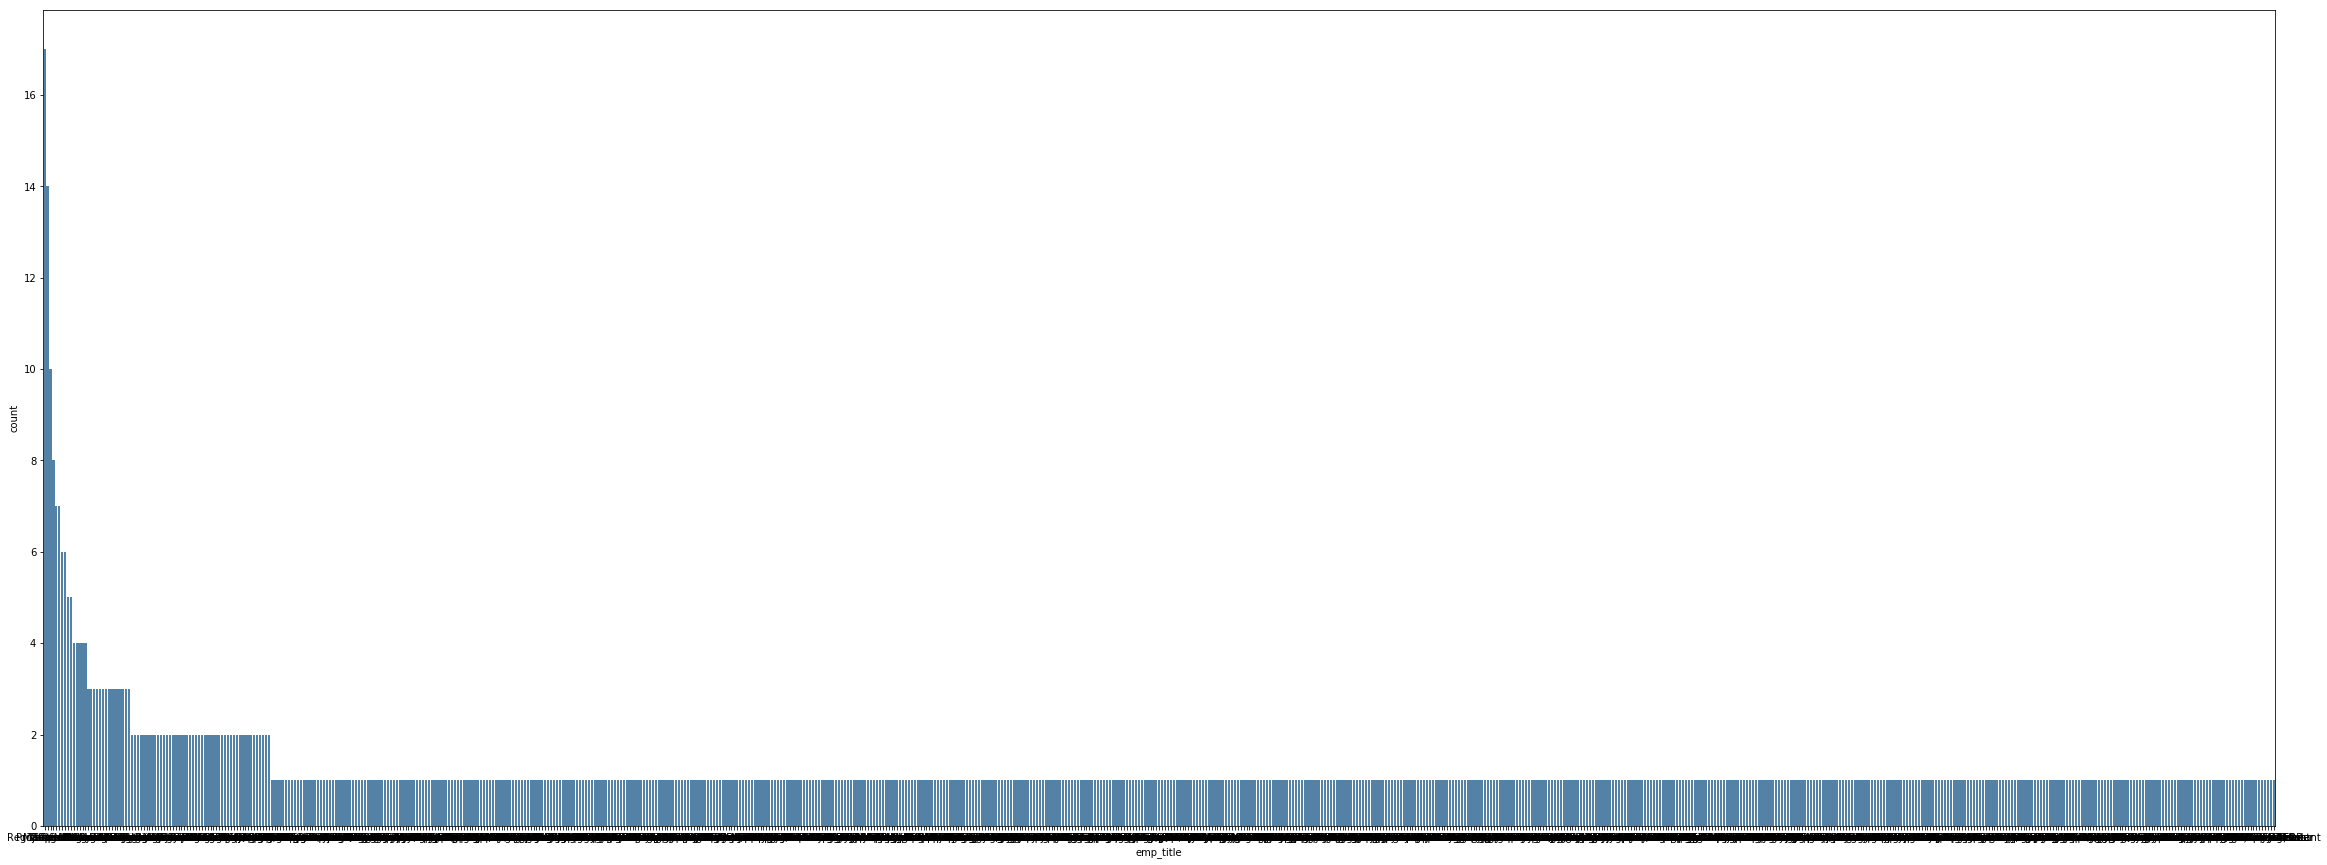

In [37]:
# Ajustar visualización XXXXXXXXXXXXXXXXXXXXXXX
plt.rcParams['figure.figsize']=40,15
sns.countplot(x=df['emp_title'], data = df, order = df['emp_title'].value_counts().index,
             color='steelblue')

In [38]:
df['home_ownership'].value_counts()

MORTGAGE    492
RENT        388
OWN         120
Name: home_ownership, dtype: int64

In [39]:
df['verification_status'].value_counts()

Source Verified    371
Not Verified       330
Verified           299
Name: verification_status, dtype: int64

In [40]:
df['purpose'].value_counts()

debt_consolidation    551
credit_card           238
home_improvement       79
other                  55
major_purchase         24
car                    15
medical                10
moving                 10
small_business          8
vacation                6
house                   2
renewable_energy        1
wedding                 1
Name: purpose, dtype: int64

In [41]:
df['application_type'].value_counts()

Individual    935
Joint App      65
Name: application_type, dtype: int64

#### 4.3 Tratamiento de datos

Nulos

estado de credito

El resto de las columnas

ordenar por alfabético

pairplot de featues

Hasta acá tenemos identificados los features que queremos usar. Vamos a eliminar las columnas innecesarias, y adoptar estrategias para gestionar los features categóricos.

We´ll use a quick visualization tool from Seaborn: Pairwise relationships with  ```pairplot()``` (((BORRADOR))

In [42]:
df3 = df[['loan_amnt','int_rate']]

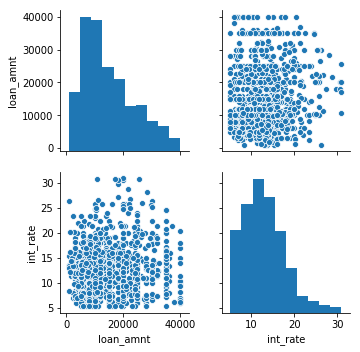

In [43]:
sns.pairplot(df3)

## Paso 2: Data Cleaning y Transformaciones

Posibles pasos:
Dropear las columnas con muchos NaNs,
Dropear las filas con créditos que no estén terminados

Eliminar caracteres de features numéricos (como emp_length)

One Hot Encoding de Categóricas



#### Preparación del Target
Vamos a quedarnos solamente con los créditos terminados, ya sea pagados (1) o irrecuperables (0)

In [46]:
# Tomamos el Target y nos quedamos solamente con los créditos terminados
df = df[(df.loan_status == 'Fully Paid') | (df.loan_status == 'Charged Off')]  

In [47]:
df['Fully Paid'] = pd.get_dummies(df.loan_status, drop_first = True)

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df['Fully Paid'].value_counts()

1    456
0    105
Name: Fully Paid, dtype: int64

Tenemos un desbalance de 80/20 hacia el 1 del target

#### 2.1 Transformaciones de features categóricos

#### 2.2 Transformaciones de features numéricos

#### 2.3 Separación de sets de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split